In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree.export import export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [2]:
dataset = pd.read_csv(
    './data/ConfLongDemo_JSI.csv',
    sep=',',
    names=["seq", "tag", "timestamp", "date", "x", "y", "z", "activity"])

In [3]:
# Encoding seq
dataset['seq'] = dataset['seq'].astype('category')
dataset['seq'] = dataset['seq'].cat.codes
# Encoding activity
dataset['activity'] = dataset['activity'].astype('category')
dataset['activity'] = dataset['activity'].cat.codes
# Encoding tag
dataset['tag'] = dataset['tag'].astype('category')
dataset['tag'] = dataset['tag'].cat.codes
# del dataset['timestamp']
#normalizing timestamp
dataset['timestamp'] = (dataset['timestamp'] -
                  dataset['timestamp'].mean()) / dataset['timestamp'].std()

# normalizing seq
dataset['seq'] = (dataset['seq'] -
                  dataset['seq'].mean()) / dataset['seq'].std()
# normalizing tag
dataset['tag'] = (dataset['tag'] -
                  dataset['tag'].mean()) / dataset['tag'].std()
# normalizing x
dataset['x'] = (dataset['x'] - dataset['x'].mean()) / dataset['x'].std()
# normalizing y
dataset['y'] = (dataset['y'] - dataset['y'].mean()) / dataset['y'].std()
# normalizing z
dataset['z'] = (dataset['z'] - dataset['z'].mean()) / dataset['z'].std()

print(dataset)

             seq       tag  timestamp                     date         x  \
0      -1.774225 -1.302171   0.525583  27.05.2009 14:03:25:127  1.366019   
1      -1.774225  1.427813   0.525593  27.05.2009 14:03:25:183  1.615982   
2      -1.774225  0.517818   0.525598  27.05.2009 14:03:25:210  1.689269   
3      -1.774225 -1.302171   0.525602  27.05.2009 14:03:25:237  1.393201   
4      -1.774225 -0.392177   0.525607  27.05.2009 14:03:25:263  1.651463   
...          ...       ...        ...                      ...       ...   
164855  1.501425 -0.392177  -0.917507  27.05.2009 11:50:41:957  0.434528   
164856  1.501425 -1.302171  -0.917503  27.05.2009 11:50:41:983  0.628153   
164857  1.501425  1.427813  -0.917498  27.05.2009 11:50:42:010  0.412067   
164858  1.501425 -0.392177  -0.917488  27.05.2009 11:50:42:063  0.369800   
164859  1.501425 -1.302171  -0.917483  27.05.2009 11:50:42:090  0.435095   

               y         z  activity  
0       0.412769  0.235318        10  
1       0

In [4]:
s = dataset['date']
print(s,type(s))
s = s.tolist()
# this proves that date is same. only time differs
print(len(s))
r = ''
for i in range(len(s)):
    r = (s[i].split())[1]
    r = r.split(':')
    t = r[0]+r[1]+r[2]+r[3]
    s[i] = int(t)
del dataset['date']
dataset['date'] = s
dataset['date'] = (dataset['date'] - dataset['date'].mean()) / dataset['date'].std()

0         27.05.2009 14:03:25:127
1         27.05.2009 14:03:25:183
2         27.05.2009 14:03:25:210
3         27.05.2009 14:03:25:237
4         27.05.2009 14:03:25:263
                   ...           
164855    27.05.2009 11:50:41:957
164856    27.05.2009 11:50:41:983
164857    27.05.2009 11:50:42:010
164858    27.05.2009 11:50:42:063
164859    27.05.2009 11:50:42:090
Name: date, Length: 164860, dtype: object <class 'pandas.core.series.Series'>
164860


In [5]:
print(dataset)
target = dataset['activity']
del dataset['activity']

             seq       tag  timestamp         x         y         z  activity  \
0      -1.774225 -1.302171   0.525583  1.366019  0.412769  0.235318        10   
1      -1.774225  1.427813   0.525593  1.615982  0.177858  2.443221        10   
2      -1.774225  0.517818   0.525598  1.689269  0.273506  1.452321        10   
3      -1.774225 -1.302171   0.525602  1.393201  0.386521  0.128646        10   
4      -1.774225 -0.392177   0.525607  1.651463  0.792755  0.184251        10   
...          ...       ...        ...       ...       ...       ...       ...   
164855  1.501425 -0.392177  -0.917507  0.434528  0.733890 -0.937181        10   
164856  1.501425 -1.302171  -0.917503  0.628153  0.649793 -0.060796        10   
164857  1.501425  1.427813  -0.917498  0.412067  0.461913  2.465883        10   
164858  1.501425 -0.392177  -0.917488  0.369800  0.494516 -0.957927        10   
164859  1.501425 -1.302171  -0.917483  0.435095  0.512274 -0.140938        10   

            date  
0       

In [6]:
x_train, x_test, y_train, y_test = train_test_split(dataset, target, test_size=0.25, random_state=0)

In [7]:
clf = LogisticRegression(penalty='l2', solver='saga',multi_class='multinomial')

In [8]:
clf.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
target_names = []
for i in range(11):
    target_names.append(str(i))

In [10]:
score = clf.score(x_test,y_test)
print(score)
y_pred = clf.predict(x_test)
print(classification_report(y_test,y_pred,target_names=target_names))
c_matrix = confusion_matrix(y_test, y_pred)
print("\n", c_matrix)

0.4087346839742812
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       743
           1       0.40      0.79      0.53     13551
           2       0.00      0.00      0.00      1529
           3       0.33      0.19      0.24      1299
           4       0.43      0.25      0.32      6781
           5       0.00      0.00      0.00       419
           6       0.37      0.12      0.18      2930
           7       0.00      0.00      0.00      4612
           8       0.00      0.00      0.00       351
           9       0.00      0.00      0.00       671
          10       0.43      0.46      0.45      8329

    accuracy                           0.41     41215
   macro avg       0.18      0.16      0.16     41215
weighted avg       0.33      0.41      0.34     41215


 [[    0   387     0     0   191     0    21     0     0     0   144]
 [    1 10694     2   267   796     0   466     0     0     0  1325]
 [    0  1067     0    29   

/home/h4v0k/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [11]:
clf = LogisticRegression(penalty='l2', solver='liblinear',multi_class='ovr')
clf.fit(x_train,y_train)
score = clf.score(x_test,y_test)
print(score)

y_pred = clf.predict(x_test)
print(classification_report(y_test,y_pred,target_names=target_names))
c_matrix = confusion_matrix(y_test, y_pred)
print("\n", c_matrix)

0.4059929637267985
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       743
           1       0.40      0.83      0.54     13551
           2       0.00      0.00      0.00      1529
           3       0.30      0.13      0.18      1299
           4       0.41      0.18      0.25      6781
           5       0.00      0.00      0.00       419
           6       0.43      0.07      0.12      2930
           7       0.00      0.00      0.00      4612
           8       0.00      0.00      0.00       351
           9       0.00      0.00      0.00       671
          10       0.42      0.46      0.44      8329

    accuracy                           0.41     41215
   macro avg       0.18      0.15      0.14     41215
weighted avg       0.32      0.41      0.32     41215


 [[    0   408     0     0   157     0     8     0     0     0   170]
 [    0 11292     0   206   660     0   227     0     0     0  1166]
 [    0  1123     0    19   

/home/h4v0k/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


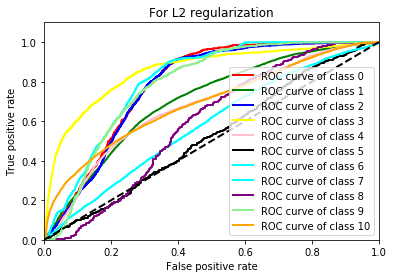

In [12]:
logreg = LogisticRegression(penalty="l2",solver="liblinear",multi_class="ovr")
y = label_binarize(y_train,classes=range(11))
y_t = label_binarize(y_test,classes=range(11))
out = OneVsRestClassifier(logreg).fit(x_train,y_train).decision_function(x_test)


# In[30]:


fpr= dict()
tpr = dict()
roc_auc = dict()
for i in range(11):
    fpr[i],tpr[i],t = roc_curve(y_t[:,i],out[:,i])
    roc_auc[i] = auc(fpr[i],tpr[i])
col = ["red","green","blue","yellow","pink","black","aqua","cyan","purple","lightgreen","orange"]
for i,c in zip(range(11),col):
    plt.plot(fpr[i],tpr[i],color=c,lw=2,label=("ROC curve of class "+str(i)))
plt.plot([0,1],[0,1],'k--',lw=2)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('For L2 regularization')
plt.legend(loc="lower right")
plt.show()



In [13]:
clf = LogisticRegression(penalty='l2', solver='newton-cg',multi_class='multinomial')
clf.fit(x_train,y_train)
score = clf.score(x_test,y_test)
print(score)

y_pred = clf.predict(x_test)
print(classification_report(y_test,y_pred,target_names=target_names))
c_matrix = confusion_matrix(y_test, y_pred)
print("\n", c_matrix)
X_train = x_train

0.4087346839742812
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       743
           1       0.40      0.79      0.53     13551
           2       0.00      0.00      0.00      1529
           3       0.33      0.19      0.24      1299
           4       0.43      0.25      0.32      6781
           5       0.00      0.00      0.00       419
           6       0.37      0.12      0.18      2930
           7       0.00      0.00      0.00      4612
           8       0.00      0.00      0.00       351
           9       0.00      0.00      0.00       671
          10       0.43      0.46      0.45      8329

    accuracy                           0.41     41215
   macro avg       0.18      0.16      0.16     41215
weighted avg       0.33      0.41      0.34     41215


 [[    0   387     0     0   191     0    21     0     0     0   144]
 [    1 10694     2   267   796     0   466     0     0     0  1325]
 [    0  1067     0    29   

/home/h4v0k/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [14]:
clf = LogisticRegression(penalty='l2', solver='lbfgs',multi_class='multinomial')
clf.fit(x_train,y_train)
score = clf.score(x_test,y_test)
print(score)

y_pred = clf.predict(x_test)
print(classification_report(y_test,y_pred,target_names=target_names))
c_matrix = confusion_matrix(y_test, y_pred)
print("\n", c_matrix)

0.4086618949411622
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       743
           1       0.40      0.79      0.53     13551
           2       0.00      0.00      0.00      1529
           3       0.33      0.19      0.24      1299
           4       0.43      0.25      0.32      6781
           5       0.00      0.00      0.00       419
           6       0.37      0.12      0.18      2930
           7       0.00      0.00      0.00      4612
           8       0.00      0.00      0.00       351
           9       0.00      0.00      0.00       671
          10       0.43      0.46      0.45      8329

    accuracy                           0.41     41215
   macro avg       0.18      0.16      0.16     41215
weighted avg       0.33      0.41      0.34     41215


 [[    0   386     0     0   191     0    22     0     0     0   144]
 [    1 10690     2   271   797     0   473     0     0     0  1317]
 [    0  1068     0    28   

/home/h4v0k/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/h4v0k/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [15]:
# Now decision tree
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=100)
decision_tree = decision_tree.fit(x_train, y_train)

In [16]:
r = export_text(decision_tree)
print(r)

|--- feature_5 <= 0.70
|   |--- feature_4 <= 1.07
|   |   |--- feature_3 <= 1.28
|   |   |   |--- feature_3 <= 0.15
|   |   |   |   |--- feature_4 <= 0.52
|   |   |   |   |   |--- feature_1 <= 0.06
|   |   |   |   |   |   |--- feature_6 <= -1.05
|   |   |   |   |   |   |   |--- feature_4 <= -0.17
|   |   |   |   |   |   |   |   |--- feature_3 <= -0.03
|   |   |   |   |   |   |   |   |   |--- feature_3 <= -0.99
|   |   |   |   |   |   |   |   |   |   |--- feature_5 <= -0.56
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- feature_5 >  -0.56
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |--- feature_3 >  -0.99
|   |   |   |   |   |   |   |   |   |   |--- feature_6 <= -1.20
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 11
|   |   |   |   |   |   |   |   |   |   |--- feature_6 >  -1.20
|   |   |   |   |   |   |   |   |   | 

In [17]:
print(decision_tree.score(x_test, y_test))

y_pred = clf.predict(x_test)
c_matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test,y_pred,target_names=target_names))
print("\n", c_matrix)

0.8475069756156739
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       743
           1       0.40      0.79      0.53     13551
           2       0.00      0.00      0.00      1529
           3       0.33      0.19      0.24      1299
           4       0.43      0.25      0.32      6781
           5       0.00      0.00      0.00       419
           6       0.37      0.12      0.18      2930
           7       0.00      0.00      0.00      4612
           8       0.00      0.00      0.00       351
           9       0.00      0.00      0.00       671
          10       0.43      0.46      0.45      8329

    accuracy                           0.41     41215
   macro avg       0.18      0.16      0.16     41215
weighted avg       0.33      0.41      0.34     41215


 [[    0   386     0     0   191     0    22     0     0     0   144]
 [    1 10690     2   271   797     0   473     0     0     0  1317]
 [    0  1068     0    28   

/home/h4v0k/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [18]:
# Now random forest
clf = RandomForestClassifier(n_estimators=100, max_depth=100,random_state=0)
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=100, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [19]:
print(clf.feature_importances_)

[0.05758435 0.06361654 0.17732016 0.20566844 0.1654153  0.15388208
 0.17651313]


In [20]:
print(clf.score(x_test, y_test))

y_pred = clf.predict(x_test)
print(classification_report(y_test,y_pred,target_names=target_names))
c_matrix = confusion_matrix(y_test, y_pred)
print("\n", c_matrix)

0.9171903433216062
              precision    recall  f1-score   support

           0       0.79      0.42      0.55       743
           1       0.93      0.98      0.96     13551
           2       0.87      0.61      0.72      1529
           3       0.90      0.90      0.90      1299
           4       0.95      0.98      0.97      6781
           5       0.84      0.52      0.64       419
           6       0.97      0.98      0.98      2930
           7       0.87      0.81      0.84      4612
           8       0.92      0.68      0.78       351
           9       0.92      0.81      0.86       671
          10       0.88      0.94      0.91      8329

    accuracy                           0.92     41215
   macro avg       0.90      0.79      0.83     41215
weighted avg       0.91      0.92      0.91     41215


 [[  315   146     0     0    56     0    28    61     0     0   137]
 [   15 13320    33    31     8     1     2    92     0     2    47]
 [    0   202   933    56   

In [21]:
## Basically the (i, j) element of a confusion matrix is the number of observations which are in class i, but predicted to be in class j
## So, if the accuracy of a model is good, then the diagonal elements will be significantly larger than other elements
## So, in a column, diagonal element must be large as compared to other numbers in the column
## We can see that this is the case in Decision tree and Random Forest models, but not in the case of Logistic Regression.